In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sys

if sys.platform == 'win32':
    path = 'C:/Users/Garren/Documents/Article - Pure PMF/Pure_MC'
else:
    path = '/home/garren/Documents/Article - Pure PMF/Pure_MC'
sys.path.insert(0, path)

from Post_procs import Post_process

In [12]:
model_variants = []
model_markers = []
colors = ['r', 'b', 'k', 'g']
MAE = []
train_MAE = []
naming_convention = ['Include clusters', 'Include zeros', 'Reference T']
size_naming = [len(naming) for naming in naming_convention]
start_position = [int(size_naming[i]/2) for i in range(len(naming_convention))]
spacing_after = [size_naming[i] - start_position[i] - 1 for i in range(len(naming_convention))]
naming = naming_convention[0]
for n in naming_convention[1:]:
    naming += f' | {n}'

true_legend_convention = []

for t in [True, False]:
    counter = 0
    tt = 'Y' if t else 'N'
    for c in [True, False]:
        cc = 'Y' if c else 'N'
        for z in [True, False]:
            zz = 'Y' if z else 'N'
            true_legend_convention += [' '*start_position[0] + f'{cc}' + ' '*spacing_after[0] + ' | ' + ' '*start_position[1] + f'{zz}' + ' '*spacing_after[1]]
            try:
                true_legend_convention[-1] += ' | ' + ' '*start_position[2] + f'{tt}' + ' '*spacing_after[2]
            except:
                pass
            if t == True:
                model_markers += [f'.{colors[counter]}']
            else:
                model_markers += [f'*{colors[counter]}']
            counter += 1

            post_obj = Post_process(include_clusters=c,
                                    include_zeros=z,
                                    refT=t,
                                    T='all')
            
            A = post_obj.get_tensors()
            err_dict = post_obj.get_testing_metrics(A=A)
            ranks = post_obj.ranks

            MAE += [[err_dict['MC', 'MAE', r][-1] for r in ranks]]
            data_dict_train = post_obj.get_reconstructed_values(A=A)
            train_MAE += [np.mean(np.abs(data_dict_train['MC [J/mol]'] - data_dict_train['Excess Enthalpy [J/mol]'][:,np.newaxis]), axis=0)]

spacing_title = '-'*len(naming)

In [3]:
matplotlib.use('Qt5Agg')
%matplotlib inline

In [13]:
max_metric = 300

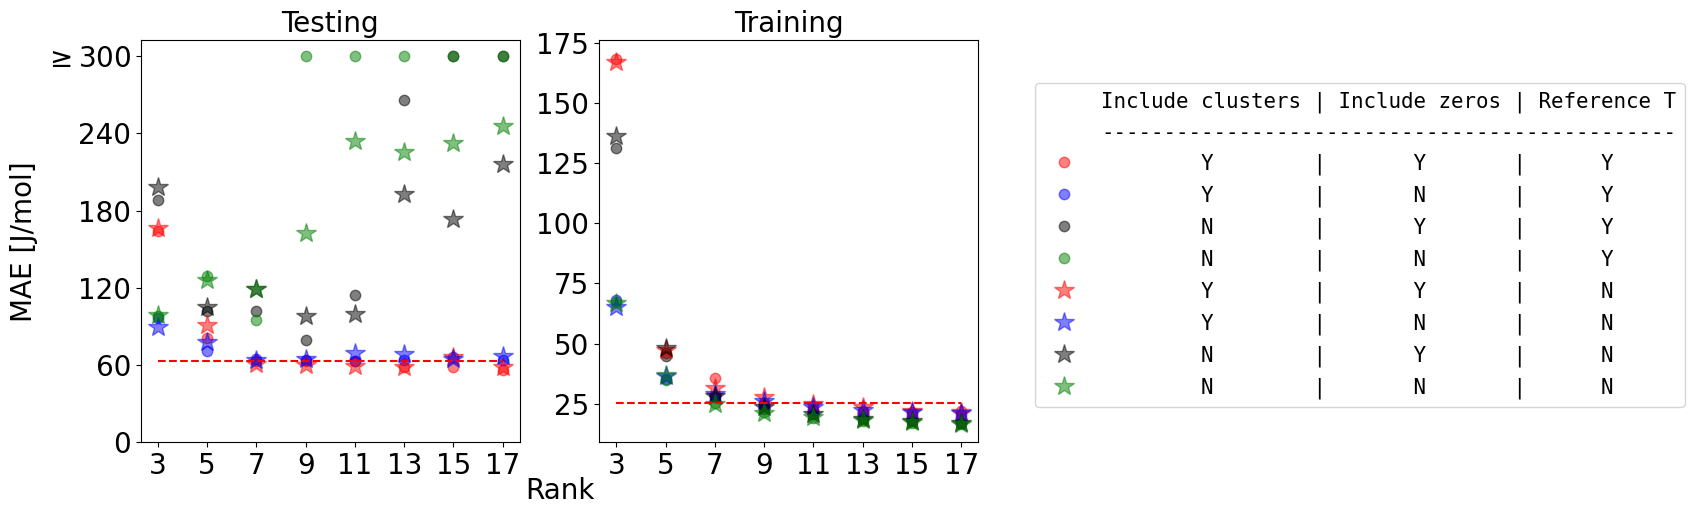

In [28]:
fig,ax = plt.subplots(1,2, figsize=(10,5), sharex=True)
markersize=15
alpha=0.5
opt_rank = 9
opt_rank_idx = np.where(post_obj.ranks == opt_rank)[0][0]
p = []
for i in range(len(model_markers)):
    p += [ax[0].plot(ranks, np.min(np.column_stack([MAE[i],max_metric*np.ones(len(MAE[i]))]), axis=1), model_markers[i], label=true_legend_convention[i], markersize=markersize, alpha=alpha)]
    ax[1].plot(ranks, np.min(np.column_stack([train_MAE[i],max_metric*np.ones(len(train_MAE[i]))]), axis=1), model_markers[i], label=true_legend_convention[i], markersize=markersize, alpha=alpha)
ax[0].plot([post_obj.ranks[0], post_obj.ranks[-1]], [MAE[0][opt_rank_idx], MAE[0][opt_rank_idx]], '--r')
ax[1].plot([post_obj.ranks[0], post_obj.ranks[-1]], [train_MAE[0][opt_rank_idx], train_MAE[0][opt_rank_idx]], '--r')
ax[0].set_ylabel('MAE [J/mol]', fontsize=20)
ax[0].set_xticks(ranks)
ax[0].set_title('Testing', fontsize=20)
ax[1].set_title('Training', fontsize=20)
for a in ax:
    a.tick_params(axis='both', which='major', labelsize=20)

empty_entry = plt.Line2D([0], [0], linestyle='None', marker=None, color='w', label=naming)
spacing_entry = plt.Line2D([0], [0], linestyle='None', marker=None, color='w', label=spacing_title)
all_legend = [empty_entry, spacing_entry] + [pp[0] for pp in p]

legend = fig.legend(all_legend, [naming, spacing_title]+true_legend_convention, loc='center right', fontsize=15, bbox_to_anchor=(1.7, 0.5)) # bbox_to_anchor=(1.7, 0.5)
fig.text(0.565, -0.02, 'Rank', ha='center', va='bottom', fontsize=20)

# Adjust the font properties for better spacing
for text in legend.get_texts():
    text.set_fontfamily('monospace')  # Change to a monospace font for consistent spacing

if sys.platform == 'win32':
    png_path = '/'.join(post_obj.path.split('/')[:8])
else:
    png_path = '/'.join(post_obj.path.split('/')[:7])
png_path += '/MAE_Overall_error_metric.png'

y_ticks = np.linspace(0, max_metric, 6)
y_labels = [f'{int(y)}' for y in y_ticks]
y_labels[-1] = r'$\geq$' + f'{max_metric}'
ax[0].set_yticks(y_ticks, y_labels)

plt.tight_layout()

plt.savefig(png_path, dpi=500, bbox_inches='tight')

In [29]:
model_variants = []
model_markers = []
colors = ['r', 'b', 'k', 'g']
MAE = []
train_MAE = []
naming_convention = ['Include clusters', 'Include zeros']
size_naming = [len(naming) for naming in naming_convention]
start_position = [int(size_naming[i]/2) for i in range(len(naming_convention))]
spacing_after = [size_naming[i] - start_position[i] - 1 for i in range(len(naming_convention))]
naming = naming_convention[0]
for n in naming_convention[1:]:
    naming += f' | {n}'

true_legend_convention = []

for t in [True]:
    counter = 0
    for c in [True, False]:
        cc = 'Y' if c else 'N'
        for z in [True, False]:
            zz = 'Y' if z else 'N'
            true_legend_convention += [' '*start_position[0] + f'{cc}' + ' '*spacing_after[0] + ' | ' + ' '*start_position[1] + f'{zz}' + ' '*spacing_after[1]]
            model_markers += [f'.{colors[counter]}']
            counter += 1

            post_obj = Post_process(include_clusters=c,
                                    include_zeros=z,
                                    refT=t,
                                    T='298')
            
            A = post_obj.get_tensors()
            err_dict = post_obj.get_testing_metrics(A=A)
            ranks = post_obj.ranks

            MAE += [[err_dict['MC', 'MAE', r][-1] for r in ranks]]
            data_dict_train = post_obj.get_reconstructed_values(A=A)
            train_MAE += [np.mean(np.abs(data_dict_train['MC [J/mol]'] - data_dict_train['Excess Enthalpy [J/mol]'][:,np.newaxis]), axis=0)]

spacing_title = '-'*len(naming)

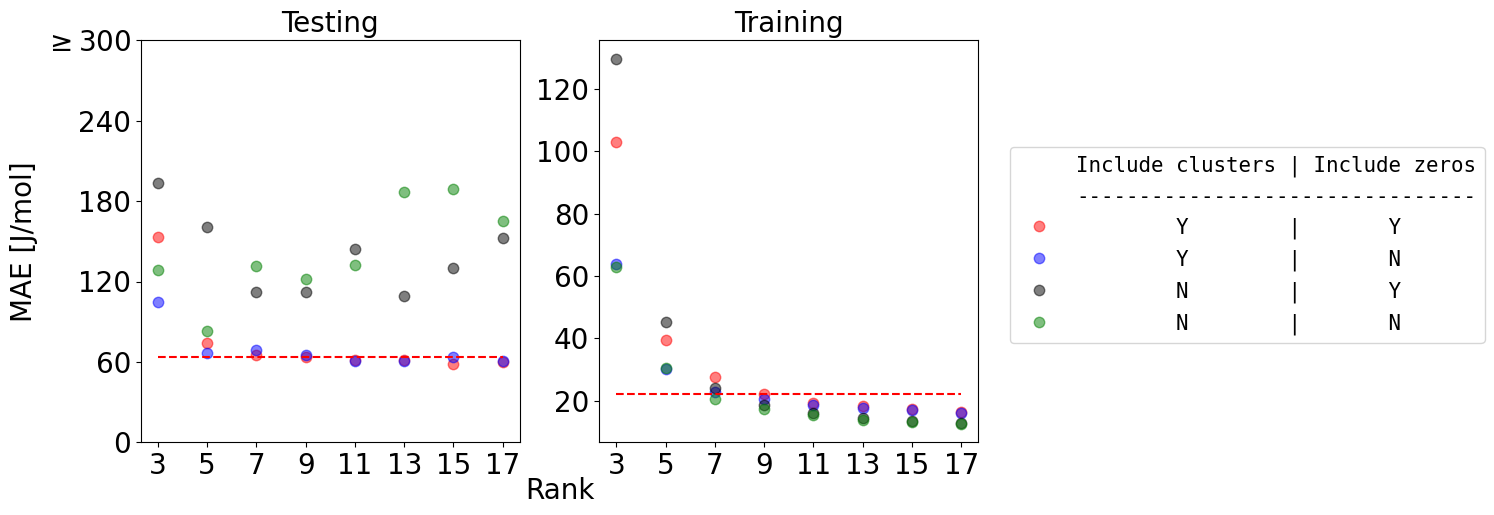

In [34]:
fig,ax = plt.subplots(1,2, figsize=(10,5), sharex=True)
markersize=15
alpha=0.5
opt_rank = 9
opt_rank_idx = np.where(post_obj.ranks == opt_rank)[0][0]
p = []
for i in range(len(model_markers)):
    p += [ax[0].plot(ranks, np.min(np.column_stack([MAE[i],max_metric*np.ones(len(MAE[i]))]), axis=1), model_markers[i], label=true_legend_convention[i], markersize=markersize, alpha=alpha)]
    ax[1].plot(ranks, np.min(np.column_stack([train_MAE[i],max_metric*np.ones(len(train_MAE[i]))]), axis=1), model_markers[i], label=true_legend_convention[i], markersize=markersize, alpha=alpha)
ax[0].plot([post_obj.ranks[0], post_obj.ranks[-1]], [MAE[0][opt_rank_idx], MAE[0][opt_rank_idx]], '--r')
ax[1].plot([post_obj.ranks[0], post_obj.ranks[-1]], [train_MAE[0][opt_rank_idx], train_MAE[0][opt_rank_idx]], '--r')
ax[0].set_ylabel('MAE [J/mol]', fontsize=20)
ax[0].set_xticks(ranks)
ax[0].set_title('Testing', fontsize=20)
ax[1].set_title('Training', fontsize=20)
for a in ax:
    a.tick_params(axis='both', which='major', labelsize=20)

empty_entry = plt.Line2D([0], [0], linestyle='None', marker=None, color='w', label=naming)
spacing_entry = plt.Line2D([0], [0], linestyle='None', marker=None, color='w', label=spacing_title)
all_legend = [empty_entry, spacing_entry] + [pp[0] for pp in p]

legend = fig.legend(all_legend, [naming, spacing_title]+true_legend_convention, loc='center right', fontsize=15, bbox_to_anchor=(1.5, 0.5))
fig.text(0.565, -0.02, 'Rank', ha='center', va='bottom', fontsize=20)

# Adjust the font properties for better spacing
for text in legend.get_texts():
    text.set_fontfamily('monospace')  # Change to a monospace font for consistent spacing

if sys.platform == 'win32':
    png_path = '/'.join(post_obj.path.split('/')[:8])
else:
    png_path = '/'.join(post_obj.path.split('/')[:7])
png_path += '/MAE_Overall_error_metric.png'

y_ticks = np.linspace(0, max_metric, 6)
y_labels = [f'{int(y)}' for y in y_ticks]
y_labels[-1] = r'$\geq$' + f'{max_metric}'
ax[0].set_yticks(y_ticks, y_labels)

plt.tight_layout()

plt.savefig(png_path, dpi=500, bbox_inches='tight')